#Лабораторная 4. Метод k-ближайших соседей

In [ ]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

data = pd.read_csv("/content/WineDataset.csv")
data.describe()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и масштабирование.

In [ ]:
if not data.isna().any().any():
    print("В данных нет пустых значений.")
else:
    data.dropna(inplace=True)
    print("Пустые значения был удалены.")

# Категориальных признаков нет, поэтому ничего с ними не делаем

# Стандартизация (масштабирование) признаков
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = data.drop("Wine", axis=1)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = data["Wine"]

В данных нет пустых значений.


Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили), постройте 3d-визуализацию признаков.

In [ ]:
rows_count = data.shape[0] # количество строк и столбцов
cols_count = data.shape[1]
# Вычисление ср.зн., дисперция, станд. откл., мин и маx
means = data.mean()
corrected_dispersions = np.sum(np.power(data - means, 2)) / (rows_count - 1)
standart_offsets = np.sqrt(corrected_dispersions)
mins = data.min()
maxs = data.max()

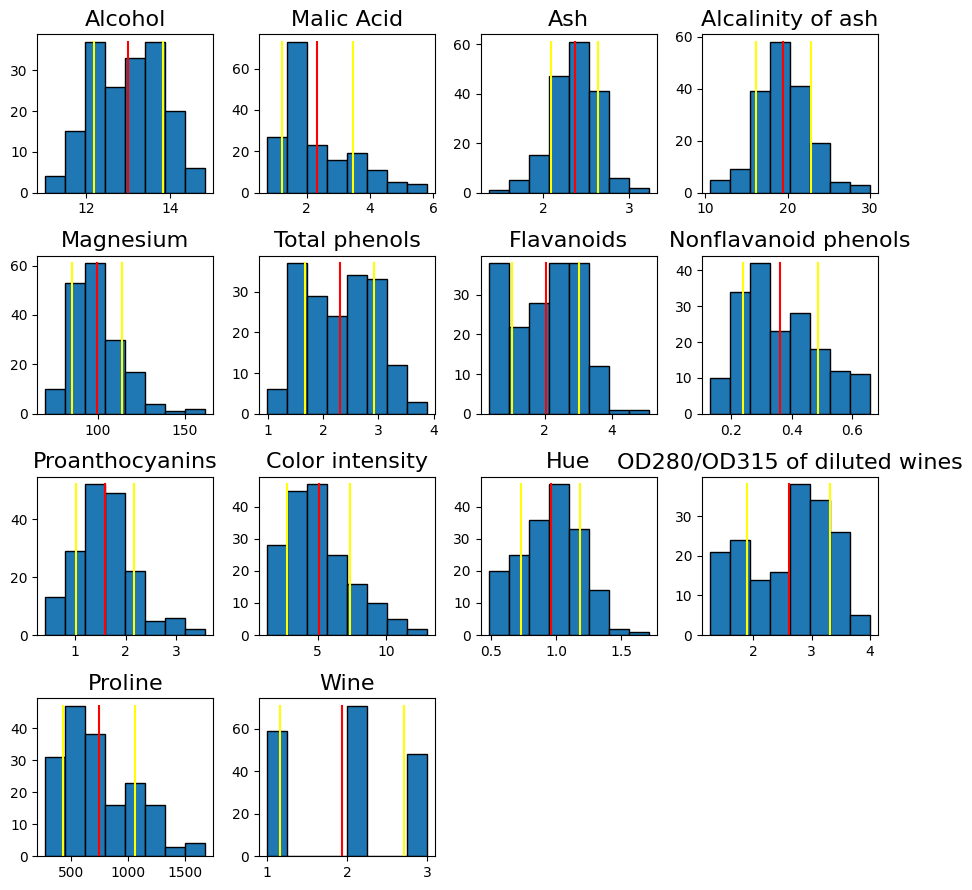

In [ ]:
bins_count = 1 + int(math.log(rows_count, 2))

titles = data.columns
fig = plt.figure(figsize=(9, 9))

for i, column in enumerate(titles):
  ax = fig.add_subplot(4, 4, i + 1)
  hist = ax.hist(data[column], bins = bins_count, edgecolor = "black")
# линии для отображения среднего значения и стандартных отклонений
  ax.plot([means[i], means[i]], [0, np.max(hist[0])], color = "red")
  ax.plot([means[i] - standart_offsets[i], means[i] - standart_offsets[i]], [0, np.max(hist[0])], color = "yellow")
  ax.plot([means[i] + standart_offsets[i], means[i] + standart_offsets[i]], [0, np.max(hist[0])], color = "yellow")

  ax.set_title(titles[i], fontsize=16)

fig.tight_layout()
plt.show()

In [ ]:
X = data.drop(columns=["Wine"]) # X содержит все столбцы данных, кроме "Wine"
y = data["Wine"] # y содержит столбец "Wine"
# Нормализация
X = (X - X.mean()) / (X.max() - X.min())

Index(['Nonflavanoid phenols', 'Proanthocyanins', 'Alcalinity of ash', 'Wine'], dtype='object')


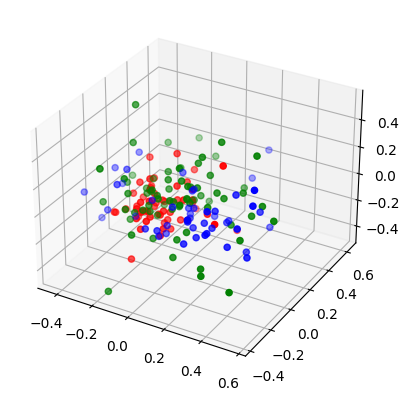

In [ ]:
# Выбор 3 случайных столбцов после нормализации
r_columns = list(X.columns)
random.shuffle(r_columns)
r_columns = r_columns[:3]

colors = { 1: "red", 2: "green", 3: "blue" }
df = X[r_columns].join(y)
# выбранные столбцы с целевой переменной
print(df.columns)
ax = plt.axes(projection="3d")

for i in list(set(y)):
  values = df.loc[df["Wine"] == i]
  ax.scatter(values[df.columns[0]], values[df.columns[1]], values[df.columns[2]], color = colors[i])

plt.show()

Теперь посмотрим на тот же график, но сформируем новые признаки методом главных компонент.

Index(['pca1', 'pca2', 'pca3', 'Wine'], dtype='object')


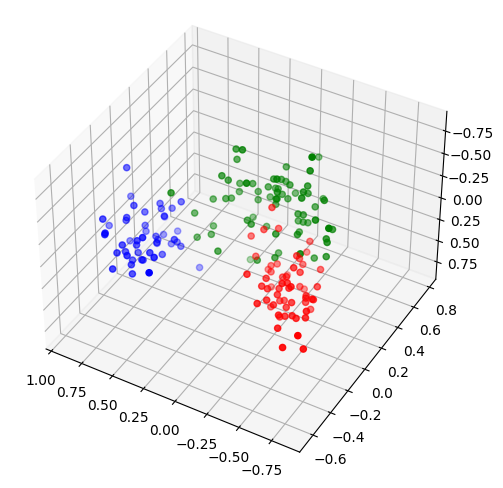

In [ ]:
# Преобразование данных в матрицу и вычисление ковариационной матрицы
X_mat = np.asarray(X)
cov = np.matmul(X_mat.T, X_mat)
# Вычисление собственных значений и собственных векторов
eig_vals, eig_vectors = np.linalg.eig(cov)
eig_vectors = eig_vectors.T
# сортировка в порядке убывания
eig = [[eig_vals[i], eig_vectors[i]] for i in range(len(eig_vals))]
eig.sort(key = lambda t: t[0], reverse = True)
# первые три вектора
pca = [eig[i][1] for i in range(3)]
X_reduced = np.matmul(pca, X_mat.T).T
X_reduced = pd.DataFrame(X_reduced, columns=["pca1", "pca2", "pca3"])
# Объединение преобразованных данных с целевой переменной
df = X_reduced.join(y)

print(df.columns)

fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(1, 3, 2, projection="3d")

for i in list(set(y)):
  values = df.loc[df["Wine"] == i]
  ax.scatter(values[df.columns[0]], values[df.columns[1]], values[df.columns[2]], color = colors[i])

ax.view_init(-140, 60)

plt.show()

Реализуйте метод k-ближайших соседей без использования сторонних библиотек, кроме NumPy и Pandas.

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# X:               признаки
# y:               метки классов
# query_point:     точка для которой выполняется классификация
# k:               количество ближайших соседей, которые будут учтены
def k_nearest_neighbors(X, y, query_point, k):
    # Вычисляем расстояние между точками в многомерном пространстве
    distances = [euclidean_distance(query_point, x) for x in X]

    # Получаем точки с наименьшими расстояниями
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y[i] for i in k_indices]
    # Берем самые часто встречающиеся
    most_common = np.bincount(k_nearest_labels).argmax()

    return most_common

Постройте две модели k-NN с различными наборами признаков:
 - Модель 1: Признаки случайно отбираются .
 - Модель 2: Фиксированный набор признаков, который выбирается заранее.

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42) # seed для генератора случайных чисел, для обеспечения воспроизводимости результатов.

# Функция для получения матриц ошибок
def get_confusion_matrices(k_values, X_model, y):
  confusion_matrices_model = []
  X_train, X_test, y_train, y_test = train_test_split(X_model, y, test_size=0.2, random_state=42)
# Для каждой точки в тестовом наборе выполняется классификация
  for k in k_values:
    y_pred_model = [k_nearest_neighbors(X_train.values, y_train.values, x, k) for x in X_test.values]
    confusion_matrix = np.zeros((3, 3), dtype=int)
# Строится матрица ошибок, которая считает, сколько точек было правильно и неправильно классифицировано для каждого класса
    for i in range(len(y_test)):
        confusion_matrix[y_test.iloc[i] - 1][y_pred_model[i] - 1] += 1
        confusion_matrices_model.append(confusion_matrix)

  return confusion_matrices_model

Для каждой модели проведите оценку на тестовом наборе данных при разных значениях k. Выберите несколько различных значений k, например, k=3, k=5, k=10, и т. д. Постройте матрицу ошибок.

In [ ]:
k_values = [3, 5, 10]

# Модель 1
random_feature_indices = np.random.choice(X.shape[1], size=3, replace=False)
X_model1 = X.iloc[:, random_feature_indices]

# Модель 2
fixed_feature_indices = [0, 1, 5]
X_model2 = X.iloc[:, fixed_feature_indices]
# Выбираются случайные признаков из матрицы признаков X.
confusion_matrices_model1 = get_confusion_matrices(k_values, X_model1, y)
# Фиксированный набор признаков
confusion_matrices_model2 = get_confusion_matrices(k_values, X_model2, y)

# Вывод матриц ошибок
for k, confusion_matrix in zip(k_values, confusion_matrices_model1):
    print(f"Матрицы ошибок для Модели 1 с k={k}:\n", confusion_matrix)

print("\n---------------------------------\n")

for k, confusion_matrix in zip(k_values, confusion_matrices_model2):
    print(f"Матрицы ошибок для Модели 2 с k={k}:\n", confusion_matrix)

Матрицы ошибок для Модели 1 с k=3:
 [[14  0  0]
 [ 2 12  0]
 [ 2  1  5]]
Матрицы ошибок для Модели 1 с k=5:
 [[14  0  0]
 [ 1 13  0]
 [ 1  1  6]]
Матрицы ошибок для Модели 1 с k=10:
 [[14  0  0]
 [ 1 12  1]
 [ 1  1  6]]

---------------------------------

Матрицы ошибок для Модели 2 с k=3:
 [[14  0  0]
 [ 1 11  2]
 [ 0  0  8]]
Матрицы ошибок для Модели 2 с k=5:
 [[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]
Матрицы ошибок для Модели 2 с k=10:
 [[13  0  1]
 [ 1 12  1]
 [ 0  0  8]]
